In [1]:
import os 
import sys 
# root_path = os.path.dirname(os.path.dirname(Path().resolve()))
# if root_path not in sys.path:
    # sys.path.append(root_path)

sys.path.append('/home/peterjaq/Project/optical_film_toolbox')


from simulator.TransferMatrix import OpticalModeling
import numpy as np 
import matplotlib.pyplot as plt 




['/home/peterjaq/Project/optical_film_toolbox/playground', '/tmp/5ecbe214-6864-4b03-98c8-82fbfb9d1907', '/home/peterjaq/anaconda3/envs/rlpyt/lib/python37.zip', '/home/peterjaq/anaconda3/envs/rlpyt/lib/python3.7', '/home/peterjaq/anaconda3/envs/rlpyt/lib/python3.7/lib-dynload', '', '/home/peterjaq/anaconda3/envs/rlpyt/lib/python3.7/site-packages', '/home/peterjaq/Project/rlpyt', '/home/peterjaq/Project/viskit', '/home/peterjaq/anaconda3/envs/rlpyt/lib/python3.7/site-packages/IPython/extensions', '/home/peterjaq/.ipython', '/home/peterjaq/Project/optical_film_toolbox', '/home/peterjaq/project/optical-film-maker/']


优化过程中的状态: [吸收]0.8295141738942662,                         [透射]0.0002715809452664142,                         [反射]0.8295141738942662


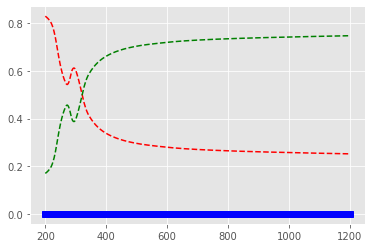

In [3]:
Device = [
    "SiO2_Malitson",
    "Zn_Werner",
    "SiO2_Malitson",
    "Zn_Werner",
    "Cu_Johnson"
    ]
#libname = "./old_work/data/Index_Refraction_Zn0.16+SiO2.csv"
OM = OpticalModeling(Device, 
                        WLrange=(200, 1200))
OM.RunSim(thickness=[30, 10, 20, 30, 100])
x = np.arange(200, 1200, 1)

print(f'优化过程中的状态: [吸收]{np.max(OM.simulation_result[0])}, \
                        [透射]{np.max(OM.simulation_result[1])}, \
                        [反射]{np.max(OM.simulation_result)}')

plt.plot(x, OM.simulation_result[0], 'r--',
        x, OM.simulation_result[1], 'bs',
        x, OM.simulation_result[2], 'g--')
        
plt.show()

In [4]:
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.sin(x) - 0.5) / np.square(1 + 0.001 * x)


# %%
from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

# %% Plot the result
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

ModuleNotFoundError: No module named 'sko'